<html><head>



Carolyn Massa - April, 2020 This is NOTEBOOK is a part of Notebook 2and primarily shows 4 different maps from different perspectives along with historical pricing data and Host levels of expertise.

Capstone #2 - AirBnb Price Prediction - An exploration into key factors that determine the pricing of an AIRBNB

    **Note this is NOTEBOOK 3 of 5  primary notebooks and 3 auxilary notebooks

Airbnb is allows home-owners and renters ('hosts') to put their properties ('listings') online, so that guests can pay to stay in them; whether they are entire apartments owned by the host or part of their own living space. Hosts are expected to set their own prices for their listings or they can pay a hefty amount to use a service (and others like "Smart Pricing") called "Beyond Pricing" which will change pricing according to Supply and Demand according to typical factors such as holidays, special events and so forth. Although Airbnb and other sites provide some general guidance, there are currently no free services which help hosts price their properties. These 3rd party algorithms will change each daily price around that base price on each day depending on day of the week, seasonality, how far away the date is, and other factors.

In order to truly maximize revenues and get princing strategy correct, it is important to understand the factors involved.  Paris ranks as one of the most visited places in the World with highly ranked Museums, world renoowned cuisine and impressive architecture. That being said the number of hosts has grown exponentially since 2015 and competition is fierce.


<ol>
Primary Source of AirBNB Data:
<li> http://insideairbnb.com/get-the-data.html</li>
Supplementary Sources of Data:
<li>2018 top 10 attractions in Paris</li> 
<li>Haversine Formula</li>
</ol>

</script>

</head>

<body>
    <h2>Here's a high-level overview:
</h2>
<ol>
  <li>Chi Squared Test</li>
  <li>3 Maps</li>
  <li>Host Experience</li>
    <li>Data Wrangling</li>
  
</ol>



<head>



1) I would like to be able to explore and answer the following questions:
•	How does each location influence the property rental price?  
•	Do reviews affect the pricing?  
•	Can a traveler stay close to the main attractions such as the Eiffel Tower and the most popular museums such as the Louvre and Musee D’Orsay?
•	What other features drive the price of an airbnb rental property?
o	i.e. price vs location, price vs distance from a top attraction, price vs. access to transportation and perhaps convention centers as there are many conventions in September

2) Recommend Airbnb properties given a certain criteria, and enable a more informed decision for a traveler:

•	walking distance to one of the top attractions (within 2 miles)
•	rating >= 8 points
•	other user defined criteria i.e. cleanliness, views, etc
•	number of beds
•	number of bedrooms
•	price range
•	type of property

3) How well can we predict a listing's price and what features correlate well with the pricing?

Business Case questions:

Where to invest in a property in Paris to get the maximum number of returns from Airbnb?
How well can we predict reviews and what features correlate well with the reviews?
Which neighborhoods have the largest increase in listings from 2015 to 2019?

I plan to compare the following months and dates using 4 different data sets from INSIDE AIRBNB to include both summary and detailed listing data, calendar data, and review daa.
<ol>
<li>Month	  Year	  Year	Year Year   Year 2019 (when listings increased the most from the previous year) 
			
<li>April	   2015	  2016	 2017    2018    2019</li>
<li>May	       2015	  2016	 2017    2018     2019</li>
<li>September  2015	  2016	 2017   2018     2019</li>
<li>October	   2015	  2016	 2017   2018    2019</li>
<li>November   2015	  2016	 2017   2018    2019</li>
<li>December   2015	  2016	 2017   2018      2019</li>
</ol>
    
    
</body>
</html>



# Below I import my libraries to collect and  explore my data

In [1]:
#Data Collection

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import geopandas
import branca
import folium
import urllib
import os
print(os.getcwd())
import pyximport
pyximport.install()
import squarify
import re
from datetime import date
import datetime
import calendar

import time
#Stats Modeling/Comparisons of Means

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import scipy.stats as stats
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from shapely.geometry import Point
import shapely.ops as sp_ops
import pyproj
import functools


import pandas_profiling

import ipywidgets as widgets

#Data Modeling/Algorithms

import sklearn
import scipy





#Word Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer




C:\Users\1800r\AIRBNB_VS_RENTALVALUES\PythonCode


In [2]:
Geo_NBH_2019 = geopandas.read_file('neighbourhoods_2019_05.geojson',
                                     driver='GeoJSON')

In [3]:
Geo_NBH_2019.head(5)

,neighbourhood,neighbourhood_group,geometry
0,Batignolles-Monceau,None,"MULTIPOLYGON (((2.29517 48.87396, 2.29504 48.8..."
1,Palais-Bourbon,None,"MULTIPOLYGON (((2.32090 48.86306, 2.32094 48.8..."
2,Buttes-Chaumont,None,"MULTIPOLYGON (((2.38943 48.90122, 2.39014 48.9..."
3,Opéra,None,"MULTIPOLYGON (((2.33978 48.88203, 2.33982 48.8..."
4,Entrepôt,None,"MULTIPOLYGON (((2.36469 48.88437, 2.36485 48.8..."


In [4]:
import json #Here I use GEOJSON to review the features in the neighborhood groups
with open('neighbourhoods_2019_05.geojson') as f:
    data = json.load(f)
for feature in data['features']:
    print(feature['properties'])

{'neighbourhood': 'Batignolles-Monceau', 'neighbourhood_group': None}
{'neighbourhood': 'Palais-Bourbon', 'neighbourhood_group': None}
{'neighbourhood': 'Buttes-Chaumont', 'neighbourhood_group': None}
{'neighbourhood': 'OpÃ©ra', 'neighbourhood_group': None}
{'neighbourhood': 'EntrepÃ´t', 'neighbourhood_group': None}
{'neighbourhood': 'Gobelins', 'neighbourhood_group': None}
{'neighbourhood': 'Vaugirard', 'neighbourhood_group': None}
{'neighbourhood': 'Reuilly', 'neighbourhood_group': None}
{'neighbourhood': 'Louvre', 'neighbourhood_group': None}
{'neighbourhood': 'Luxembourg', 'neighbourhood_group': None}
{'neighbourhood': 'Ã‰lysÃ©e', 'neighbourhood_group': None}
{'neighbourhood': 'Temple', 'neighbourhood_group': None}
{'neighbourhood': 'MÃ©nilmontant', 'neighbourhood_group': None}
{'neighbourhood': 'PanthÃ©on', 'neighbourhood_group': None}
{'neighbourhood': 'Passy', 'neighbourhood_group': None}
{'neighbourhood': 'Observatoire', 'neighbourhood_group': None}
{'neighbourhood': 'Popincour

Data Wrangling - Here I explore more of my data with a cleaned data set from my Primary File

In [5]:
listing_2019_April = pd.read_csv('Listing_2019_04_Cleaned_2.csv', parse_dates=['host_since'],low_memory=False)

In [6]:
listing_2019_April.head(5)

,Unnamed: 0,id,host_id,host_name,host_since,host_location,host_response_time,instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,first_review,instant_bookable.1,guests_included,extra_people,neighbourhood,beds,cleaning_fee,latitude,longitude,zipcode,smart_location,property_type,room_type,accommodates,bed_type,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,cancellation_policy,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,last_review,rating_ind,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer,GroupedbyPriceRange,Rating_By_Range
0,0,2394,2626,Franck,2008-08-30 00:00:00,"Paris, Île-de-France, France",within an hour,f,100%,t,t,2008-11-03,f,1,$0.00,Temple,1.0,$30.00,48.86518,2.35590,75003,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$200.00,89.0,9.0,8.0,9.0,9.0,9.0,9.0,52,7,71,0.56,moderate,2,9,31,52,315,2015-09-05,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0-100,51-75
1,1,2577,2827,Karine,2008-09-09 00:00:00,"Casablanca, Grand Casablanca, Morocco",0,t,NaN,f,t,2019-01-02,t,1,$0.00,Entrepôt,2.0,$40.00,48.86993,2.36251,75010,"Paris, France",Other,Entire home/apt,4,Real Bed,$0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,125,3,1,0.31,strict_14_with_grace_period,1,0,0,0,148,2019-01-02,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,101-150,NaN
2,2,3109,3631,Anne,2008-10-14 00:00:00,"Paris, Île-de-France, France",within an hour,f,100%,f,f,2016-12-27,f,1,$0.00,Observatoire,0.0,$50.00,48.83349,2.31852,75014,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,75,3,8,0.29,flexible,1,15,15,15,277,2018-12-19,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,0-100,51-75
3,3,5396,7903,Borzou,2009-02-14 00:00:00,"Istanbul, İstanbul, Turkey",within an hour,t,100%,f,t,2009-06-30,t,1,$0.00,Hôtel-de-Ville,1.0,$36.00,48.85100,2.35869,75004,"Paris, France",Apartment,Entire home/apt,2,Pull-out Sofa,$0.00,91.0,9.0,8.0,9.0,9.0,10.0,9.0,115,1,168,1.41,strict_14_with_grace_period,1,1,1,21,59,2019-03-25,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,NaN,101-150,NaN
4,4,7397,2626,Franck,2008-08-30 00:00:00,"Paris, Île-de-France, France",within an hour,f,100%,t,t,2011-04-08,f,2,$10.00,Hôtel-de-Ville,2.0,$50.00,48.85758,2.35275,75004,"Paris, France",Apartment,Entire home/apt,4,Real Bed,$200.00,94.0,10.0,9.0,10.0,10.0,10.0,10.0,115,10,241,2.47,moderate,2,0,10,23,216,2019-03-22,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN,101-150,NaN


In [7]:
listing_2019_April.groupby('host_id')['id'].nunique().reset_index().describe(percentiles=(0.75, 0.95)) #From this data it looks like 5% of the hosts in Paris rent more than one location

,host_id,id
count,4.748100e+04,47481.000000
mean,5.630041e+07,1.187022
std,6.539501e+07,2.731703
min,2.419000e+03,1.000000
50%,2.915008e+07,1.000000
75%,7.464769e+07,1.000000
95%,2.150334e+08,2.000000
max,2.540981e+08,293.000000


In [8]:
NBH_df = pd.DataFrame(listing_2019_April.groupby('neighbourhood').size())
NBH_df.rename(columns={0: 'number_of_listings'}, inplace=True)
NBH_df['median_price'] = listing_2019_April.groupby('neighbourhood').price.median().values



In [9]:
NBH_df.describe()

,number_of_listings,median_price
count,20.000000,20.000000
mean,2818.050000,90.650000
std,1451.461386,22.490407
min,1152.000000,60.000000
25%,1827.750000,72.250000
50%,2220.000000,85.000000
75%,3498.000000,110.000000
max,6590.000000,135.000000


 # Here I create a new list where I group by neighborhoods and their listing ids associated listing id so we can see # of listings by neighborhood

In [10]:
nbh_count_2019_04 = listing_2019_April.groupby('neighbourhood')['id'].nunique().reset_index() 
nbh_count_2019_04.rename(columns={'id':'nb'}, inplace=True) #nb=an airbnb listing


In [11]:
nbh_count_2019_04.head(55) #Here are my counts by Neighborhood

,neighbourhood,nb
0,Batignolles-Monceau,3789
1,Bourse,1980
2,Buttes-Chaumont,3225
3,Buttes-Montmartre,6590
4,Entrepôt,4071
5,Gobelins,2061
6,Hôtel-de-Ville,1859
7,Louvre,1152
8,Luxembourg,1734
9,Ménilmontant,3401


In [12]:
Geo_NBH_2019 = pd.merge(Geo_NBH_2019, nbh_count_2019_04, on='neighbourhood')
Geo_NBH_2019['QP'] = Geo_NBH_2019['nb'] / Geo_NBH_2019['nb'].sum()
Geo_NBH_2019['QP_str'] = Geo_NBH_2019['QP'].apply(lambda x : str(round(x*100, 1)) + '%')

In [13]:
Geo_NBH_2019.head(25)

,neighbourhood,neighbourhood_group,geometry,nb,QP,QP_str
0,Batignolles-Monceau,None,"MULTIPOLYGON (((2.29517 48.87396, 2.29504 48.8...",3789,0.067227,6.7%
1,Palais-Bourbon,None,"MULTIPOLYGON (((2.32090 48.86306, 2.32094 48.8...",1640,0.029098,2.9%
2,Buttes-Chaumont,None,"MULTIPOLYGON (((2.38943 48.90122, 2.39014 48.9...",3225,0.057220,5.7%
3,Opéra,None,"MULTIPOLYGON (((2.33978 48.88203, 2.33982 48.8...",2686,0.047657,4.8%
4,Entrepôt,None,"MULTIPOLYGON (((2.36469 48.88437, 2.36485 48.8...",4071,0.072231,7.2%
5,Gobelins,None,"MULTIPOLYGON (((2.37491 48.83801, 2.37698 48.8...",2061,0.036568,3.7%
6,Vaugirard,None,"MULTIPOLYGON (((2.29932 48.85217, 2.30088 48.8...",4250,0.075407,7.5%
7,Reuilly,None,"MULTIPOLYGON (((2.41388 48.83357, 2.41401 48.8...",2269,0.040258,4.0%
8,Louvre,None,"MULTIPOLYGON (((2.32801 48.86992, 2.32997 48.8...",1152,0.020440,2.0%
9,Luxembourg,None,"MULTIPOLYGON (((2.34459 48.85405, 2.34428 48.8...",1734,0.030766,3.1%


In [14]:
nbh_color_map_2019_04 = branca.colormap.linear.YlOrRd_09.scale(min(nbh_count_2019_04['nb']),
                                                                   max(nbh_count_2019_04['nb']))

In [15]:
map_test = nbh_color_map_2019_04    

In [16]:
nbh_color_map_2019_04


In [17]:
nbh_locs_2019_04_map = folium.Map(location=[48.856614, 2.3522219], zoom_start = 12, tiles='cartodbpositron')
style_function = lambda x: {
    'fillColor': map_test (x['properties']['nb']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}
nbh_locsNb_2019_04 = folium.GeoJson(
   Geo_NBH_2019,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'nb', 'QP_str'],
        aliases=['Neighbourhood', 'Location amount', 'Quote-part'],
        localize=True
    )
).add_to(nbh_locs_2019_04_map)

map_test.add_to(nbh_locs_2019_04_map)
map_test.caption = 'Airbnb location amount'
map_test.add_to(nbh_locs_2019_04_map)

In [18]:
nbh_locs_2019_04_map.save('location_amount_map.html')

In [19]:
nbh_locs_2019_04_map


# Below I read in a file I pulled from Trip Advisor on the Top 10 Attractions in Paris

In [20]:
paris_top_10 = pd.read_excel('Top_10.xlsx', encoding = "latin1")
paris_top_10.head(5)

,Unnamed: 0,name,latitude,longitude,arrondissement,area
0,NaN,Eiffel Tower,48.8584,2.2945,7,Palais-Bourbon
1,NaN,The Louvre,48.8606,2.3376,1,Louvre
2,NaN,Jardin du Luxembourg,48.8462,2.3372,6,Luxembourg
3,NaN,Le Marais,48.8587,2.3588,3,Hôtel-de-Ville
4,NaN,Musee d'Orsay,48.8600,2.3266,7,Palais-Bourbon


In [21]:
paris_top_10.drop(['Unnamed: 0'], axis=1,inplace=True)

In [22]:
paris_top_10.drop(['arrondissement'], axis=1,inplace=True)

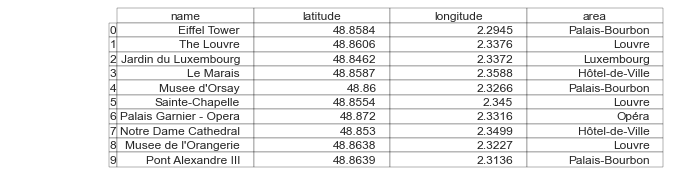

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

#from pandas.plotting.table import table
import numpy as np
from pandas.plotting import scatter_matrix
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, paris_top_10, loc='upper right', colWidths=[0.17]*len(paris_top_10.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table
plt.savefig('table.png', transparent=True)

#Below I created a formula using the haversine calculation and applying to the coordinates of Paris Proper

In [24]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    
    '''Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)'''
    
    lat1 = float(lat1)
    lon1 = float(lon1)
    lat2 = float(lat2)
    lon2 = float(lon2)
    #miles_constant = 3959
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    #haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3959
    mi = r * c
    return mi

In [25]:
print(haversine(48.89247049179856,2.378547117789503,48.8516,2.3574))

2.98311774765089


In [26]:
paris_top_10.reset_index()

,index,name,latitude,longitude,area
0,0,Eiffel Tower,48.8584,2.2945,Palais-Bourbon
1,1,The Louvre,48.8606,2.3376,Louvre
2,2,Jardin du Luxembourg,48.8462,2.3372,Luxembourg
3,3,Le Marais,48.8587,2.3588,Hôtel-de-Ville
4,4,Musee d'Orsay,48.8600,2.3266,Palais-Bourbon
5,5,Sainte-Chapelle,48.8554,2.3450,Louvre
6,6,Palais Garnier - Opera,48.8720,2.3316,Opéra
7,7,Notre Dame Cathedral,48.8530,2.3499,Hôtel-de-Ville
8,8,Musee de l'Orangerie,48.8638,2.3227,Louvre
9,9,Pont Alexandre III,48.8639,2.3136,Palais-Bourbon


In [27]:

#Create new data points:
#closest_attraction - set to the Attraction name with the shortest distance to the Airbnb property
#attraction_dist - set to the distance of the Attraction closest to the Airbnb property
#site_count - set to the number of attractions within 1 mile of the Airbnb property
#a new column is created for each of the top attraction, which contains the distance between the Airbnb
#property and the attraction/site

#set columns for distance to attraction
for i, bnb in listing_2019_April.iterrows():
    dist_to_attraction = []
    
    site_count = 0
    
    for j, site in paris_top_10.iterrows():
        
        locitem = {}
        locitem['name'] = paris_top_10.loc[j, 'name']
        #print(site['area'], site['attraction'])
        locitem['distance'] = haversine(listing_2019_April.loc[i, 'latitude'], 
                                        listing_2019_April.loc[i, 'longitude'],
                                         site['latitude'],site['longitude'])
        listing_2019_April.loc[i, site['name']] = locitem['distance']
        dist_to_attraction.append(locitem)
        
        if locitem['distance'] <= 1.0:
            site_count += 1
    
    dist_sorted = sorted(dist_to_attraction, key = lambda i: (i['distance'], i['name']))    
    listing_2019_April.loc[i,'nearest_attraction'] = dist_sorted[0]['name']
    listing_2019_April.loc[i,'attraction_dist'] = dist_sorted[0]['distance']
    
    listing_2019_April.loc[i, 'site_count'] = site_count
    
    if dist_sorted[0]['distance'] < 2.0:
        listing_2019_April.loc[i,'close_to_attraction'] = 1
    else:
        listing_2019_April.loc[i,'close_to_attraction'] = 0

In [28]:
PricesByReviews = listing_2019_April.groupby('review_scores_rating')['price'].mean().reset_index()
PricesByReviews.rename(columns={'price':'avgPrice'}, inplace=True) 
PricesByReviews.head(5)

,review_scores_rating,avgPrice
0,0.0,135.341374
1,20.0,119.394737
2,27.0,79.000000
3,30.0,115.000000
4,33.0,100.000000


In [29]:
PricesByReviews.plot

In [30]:
Price_By_Type = listing_2019_April.sort_values(by='property_type')

The object created below shows the average price of all those properties within 2 miles of the top 10 attractions

In [31]:
#near an attraction
df4= listing_2019_April[listing_2019_April.close_to_attraction >= 1]["price"] #Here I create an object to separate those clients that exited the bank by their bank balance
df4.mean()

115.5798061918431

In [32]:
#Not near an attraction
df5= listing_2019_April[listing_2019_April.close_to_attraction <= 0]["price"] #Here I create an object to separate those clients that exited the bank by their bank balance
df5.mean()

75.72743601257297

In [33]:
df2 = listing_2019_April[['price', 'close_to_attraction']]#I create a new dataframe to include just if the listing is close to a Top Ten attraction and its price to apply to my CHI SQUARE test
df2.head(5)

,price,close_to_attraction
0,52,1.0
1,125,1.0
2,75,1.0
3,115,1.0
4,115,1.0


In [34]:
df_chi = df2 #Here I wish to apply my dataframe above to my CHI SQUARE TEST to see the relationship between properties close to attractions and those not close to attractions
contingency_table=pd.crosstab(df_chi["price"],df_chi["close_to_attraction"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)

Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 close_to_attraction  0.0   1.0
price                         
0                      2     5
8                      0     2
9                      2    12
10                     5    15
11                     0     1
12                     1     3
13                     0     4
14                     0     6
15                     4    12
16                     1     2
17                     0     6
18                     2     9
19                     4     8
20                    33    69
21                     7    22
22                    11    43
23                    11    38
24                    10    19
25                    53   196
26                    13    45
27                    17    50
28                    26    67
29                    16    74
30                   123   472
31                    19    59
32                    20   101
33                    22   106
34                    18    97
35                   163   690
36               

##STATS TESTS for H0 = "It makes no difference in Price for properties that are located near any of the top 10 attractions in Paris" 
The results show a relationship so we reject the HO and go with the HA which is staying at a property near an attraction effects the price 

In [35]:
#How many listings are in each of the 19 neighborhoods; I immediately notice tht 
listing_2019_April['neighbourhood'].value_counts()

Buttes-Montmartre      6590
Popincourt             5698
Vaugirard              4250
Entrepôt               4071
Batignolles-Monceau    3789
Ménilmontant           3401
Buttes-Chaumont        3225
Temple                 2809
Opéra                  2686
Reuilly                2269
Observatoire           2171
Gobelins               2061
Bourse                 1980
Panthéon               1954
Hôtel-de-Ville         1859
Luxembourg             1734
Palais-Bourbon         1640
Passy                  1549
Élysée                 1473
Louvre                 1152
Name: neighbourhood, dtype: int64

# Here I will review the average price per each neighborhood in Paris


In [36]:
Price_NBH_2019_04 = listing_2019_April.groupby('neighbourhood')['price'].mean().reset_index() #Here I write a code to aggregate each neighborhood by average price 
Price_NBH_2019_04.rename(columns={'price':'avgPrice'}, inplace=True) #I rename my price column to "AVERAGE PRICE"
nbh_geo_price_2019_04 = pd.merge(Geo_NBH_2019, Price_NBH_2019_04, on='neighbourhood')

In [37]:
Price_NBH_2019_04.head(5)

,neighbourhood,avgPrice
0,Batignolles-Monceau,106.809976
1,Bourse,140.209596
2,Buttes-Chaumont,77.680930
3,Buttes-Montmartre,81.824734
4,Entrepôt,100.133874


In [38]:
nbh_price_colormap_2019_04 = branca.colormap.linear.YlGnBu_09.scale(min(Price_NBH_2019_04['avgPrice']),
                                                                 max(Price_NBH_2019_04['avgPrice']))

In [39]:
NBH_LOC_PRICE_MAP_2019_04 = folium.Map(location=[48.856614, 2.3522219], zoom_start = 12, tiles='cartodbpositron')

style_function = lambda x: {
    'fillColor': nbh_price_colormap_2019_04(x['properties']['avgPrice']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}


NBH_locprice_map_2019_04 = folium.GeoJson(
    nbh_geo_price_2019_04,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'avgPrice'],
        aliases=['Neighbourhood', 'Average price'],
        localize=True
    )
).add_to(NBH_LOC_PRICE_MAP_2019_04)


nbh_price_colormap_2019_04.add_to(NBH_LOC_PRICE_MAP_2019_04)
nbh_price_colormap_2019_04.caption = 'Paris Airbnb Neighborhood by Averge Price'
nbh_price_colormap_2019_04.add_to(NBH_LOC_PRICE_MAP_2019_04)


In [40]:
NBH_LOC_PRICE_MAP_2019_04

In [41]:

nbh_price_colormap_2019_04.save('nbh_price_colormap_2019_04.html')


#Now I would like to explore room price by type (There are 3 basic types of rooms listed: Private room, Shared Room, Entire House/Apartment)

In [42]:
Price_By_Type_NBH_2019_04 = listing_2019_April.groupby(['room_type', 'neighbourhood'])['price'].mean().reset_index()
Price_By_Type_NBH_2019_04 = Price_By_Type_NBH_2019_04.rename(columns={'price':'avg_price'})
Price_By_Type_NBH_2019_04 = Price_By_Type_NBH_2019_04.sort_values('avg_price', ascending=False).reset_index(drop=True)

In [43]:
Price_By_Type_NBH_2019_04.head(5)
    
# We see that a Private room in the Elysee area is more expensive than a Private room in Opera

,room_type,neighbourhood,avg_price
0,Private room,Élysée,365.285000
1,Entire home/apt,Élysée,222.455766
2,Private room,Louvre,204.601399
3,Private room,Opéra,202.514423
4,Private room,Luxembourg,196.822785


Now I would like to further break down the neighborhoods and see the average prices per room type

In [44]:
Private_Room_AVG_2019_04 = Price_By_Type_NBH_2019_04[Price_By_Type_NBH_2019_04['room_type']=='Private room'].reset_index(drop=True)
Entire_Hs_AVG_2019_04 = Price_By_Type_NBH_2019_04[Price_By_Type_NBH_2019_04['room_type']=='Entire home/apt'].reset_index(drop=True)
Shared_Room_2019_04 = Price_By_Type_NBH_2019_04[Price_By_Type_NBH_2019_04['room_type']=='Shared room'].reset_index(drop=True)

In [45]:
Private_Room_AVG_2019_04

,room_type,neighbourhood,avg_price
0,Private room,Élysée,365.285000
1,Private room,Louvre,204.601399
2,Private room,Opéra,202.514423
3,Private room,Luxembourg,196.822785
4,Private room,Palais-Bourbon,163.680233
5,Private room,Temple,155.660099
6,Private room,Hôtel-de-Ville,150.651316
7,Private room,Bourse,150.236453
8,Private room,Batignolles-Monceau,139.666667
9,Private room,Panthéon,120.528517


#Let's review these 3 room types

In [46]:
Room_TYPE_Accomodates = pd.pivot_table(data=listing_2019_April,
                                        index='accommodates',
                                        columns='room_type',
                                        values='id',
                                        aggfunc='count',
                                        fill_value=0).reset_index()

# Below I create a function to show the experience of each host and how many listings each has by years of experience

In [47]:
listing_2019_April['host_since'] = pd.to_datetime(listing_2019_April['host_since'], errors='coerce')

#Here I must write a function to calculate the time each host has been active

In [48]:
def calculate_hosts_expertise_by_year(this_year, start_date):
    if type(start_date) == int:
        return '0 year'
    else:
        seniority = this_year - start_date.year
        if seniority < 2:
            return str(seniority) + ' year'
        elif 2 <= seniority < 8:
            return str(seniority) + ' years'
        else:
            return '>= 8 years'

In [49]:

now = datetime.datetime.now()
listing_2019_April['host_expertise'] = listing_2019_April['host_since'].apply(lambda x: calculate_hosts_expertise_by_year(now.year, x))

In [50]:
host_seniority_19_04 = listing_2019_April.groupby('host_expertise')['host_id'].nunique().reset_index()

host_seniority_19_04.rename(columns={'host_id':'nb'}, inplace=True)
host_seniority_19_04['QP'] = host_seniority_19_04['nb'] / host_seniority_19_04['nb'].sum()
host_seniority_19_04['labels'] = host_seniority_19_04.apply(
    lambda row: '%s\n%d locations\n(%.1f%%)' % (row['host_expertise'], row['nb'], row['QP']*100),
    axis=1)
host_seniority_19_04.sort_values('QP', ascending=False, inplace=True)

(0.0, 100.0, 0.0, 100.0)

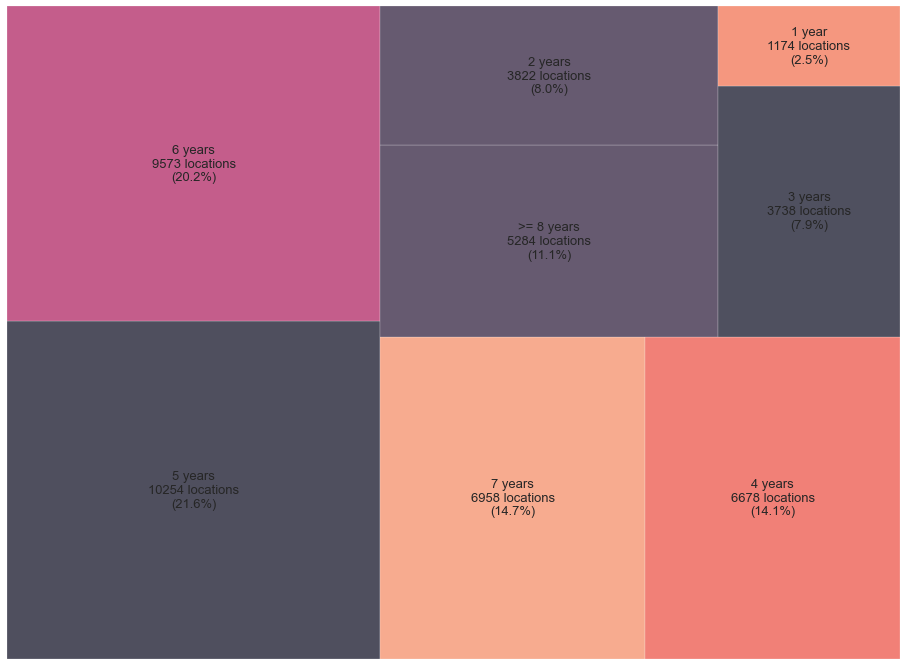

In [51]:
plt.figure(figsize=(16, 12))

plt.rc('font', size=13)
squarify.plot(sizes=host_seniority_19_04.nb,
              label=host_seniority_19_04.labels,
              alpha=0.7)
plt.axis('off')

Insights:  We notice that those hosts with more than 5 years experience run 21.6% of the locations and those hosts with greater than 8 years experience have 11% of listings

In [52]:
from shapely.geometry import Point, shape 
import geopandas as gpd
import folium

locs_2019_04_geometry = [Point(xy) for xy in zip(listing_2019_April.longitude, listing_2019_April.latitude)]
crs = {'init': 'epsg:4326'} # Coordinate Reference Systems, "epsg:4326" is a common projection of WGS84 Latitude/Longitude
locs_2019_04_gdf = gpd.GeoDataFrame(listing_2019_April, crs=crs, geometry=locs_2019_04_geometry)

C:\Users\1800r\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [53]:
from folium import plugins
locs_2019_04_map = folium.Map(location=[48.856614, 2.3522219], zoom_start = 13, tiles='cartodbpositron')

feature_ea = folium.FeatureGroup(name='Entire home/apt')
feature_pr = folium.FeatureGroup(name='Private room')
feature_sr = folium.FeatureGroup(name='Shared room')

for i, v in locs_2019_04_gdf.iterrows(): #here I use HTML to create my pop-up menu
    popup = """
    Location id : <b>%s</b><br>
    Host name : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    Minimum nights : <b>%d</b><br>
    """ % (v['id'], v['host_name'], v['room_type'], v['neighbourhood'], v['price'], v['minimum_nights'])
    
    if v['room_type'] == 'Entire home/apt':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(feature_ea)
    elif v['room_type'] == 'Private room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(feature_pr)
    elif v['room_type'] == 'Shared room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#FF0700',
                            fill_color='#FF0700',
                            fill=True).add_to(feature_sr)

feature_ea.add_to(locs_2019_04_map)
feature_pr.add_to(locs_2019_04_map)
feature_sr.add_to(locs_2019_04_map)
folium.LayerControl(collapsed=False).add_to(locs_2019_04_map)


In [54]:
locs_2019_04_map

In [55]:
locs_2019_04_map_b = folium.Map(location=[48.856614, 2.3522219], zoom_start = 13, tiles='cartodbpositron')

marker_cluster = plugins.MarkerCluster().add_to(locs_2019_04_map_b)

for i, v in locs_2019_04_gdf.iterrows():
    popup = """
    Location id : <b>%s</b><br>
    Host name : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    Minimum nights : <b>%d</b><br>
    """ % (v['id'], v['host_name'], v['room_type'], v['neighbourhood'], v['price'], v['minimum_nights'])
    
    if v['room_type'] == 'Entire home/apt':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(marker_cluster)
    elif v['room_type'] == 'Private room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(marker_cluster)
    elif v['room_type'] == 'Shared room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#FF0700',
                            fill_color='#FF0700',
                            fill=True).add_to(marker_cluster)

In [56]:
locs_2019_04_map_b

In [57]:
listing_2019_April.to_csv('listing_2019_April_July_9.csv')